In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("../Udemy/Resources/DATA/mouse_viral_study.csv")
df.head(5)

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


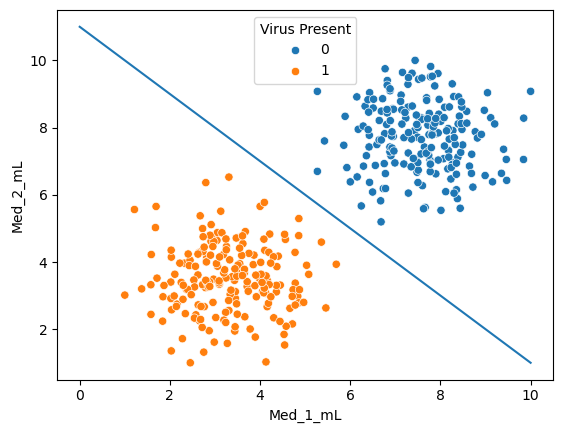

In [18]:
sns.scatterplot(x = df.Med_1_mL, y = df.Med_2_mL, hue =df['Virus Present'] )

# hyper plane
x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m*x + b
plt.plot(x, y)
plt.show()

In [19]:
from sklearn.svm import SVC

In [20]:
y = df['Virus Present']

In [21]:
X = df.drop('Virus Present', axis = 1)

In [24]:
model = SVC(kernel='linear', C = 1000)

In [26]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [30]:
from svm_margin_plot import plot_svm_boundary

C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


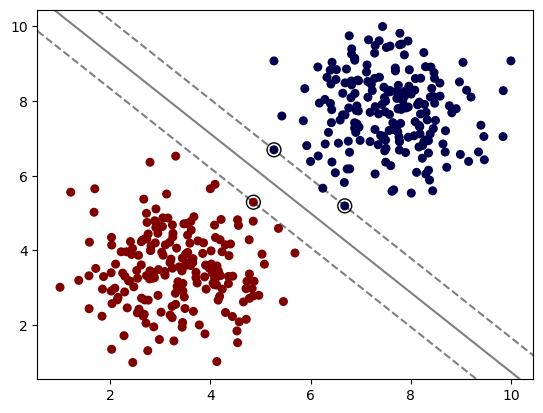

In [31]:
plot_svm_boundary(model, X, y)

C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


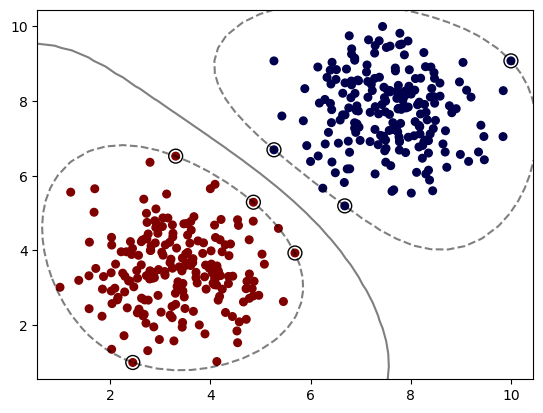

In [47]:
model1 = SVC(C = 100, gamma = 'scale')
model1.fit(X, y)
plot_svm_boundary(model1, X, y)
plt.show()

C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


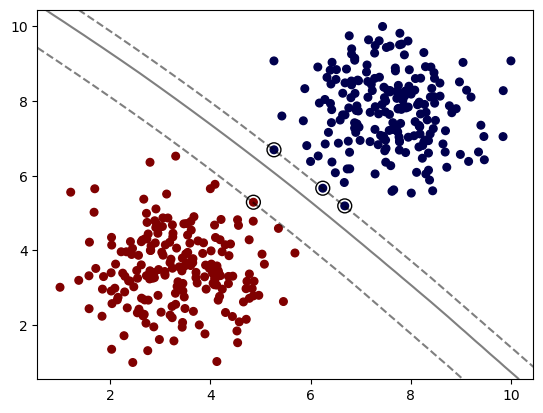

In [57]:
model2 = SVC(kernel="poly", degree = 10)
model2.fit(X, y)
plot_svm_boundary(model2, X, y)

In [58]:
from sklearn.model_selection import GridSearchCV

In [61]:
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1, 100, 10000], 'kernel':['linear', 'rbf']}

In [62]:
grid = GridSearchCV(svm, param_grid)
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 100, 10000],
                         'kernel': ['linear', 'rbf']})

In [64]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [68]:
df1 = pd.read_csv('../Udemy/Resources/DATA/cement_slump.csv')
df1.head(5)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


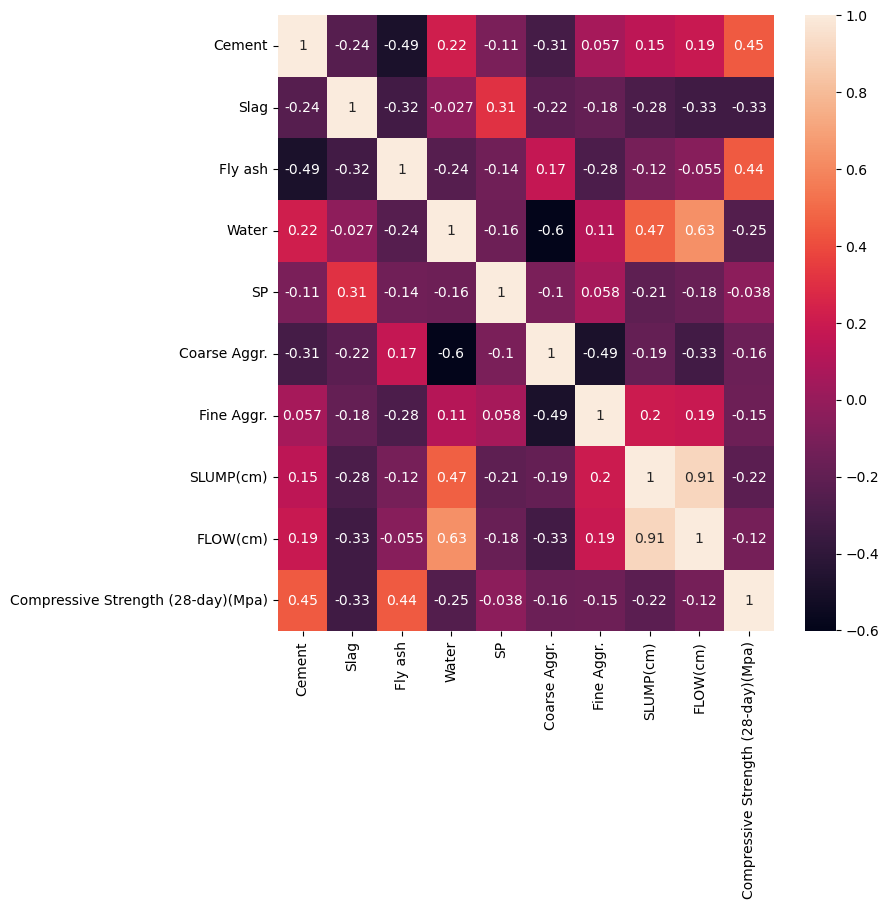

In [74]:
plt.figure(figsize = (8, 8))
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [75]:
df1.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [76]:
X = df1.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df1['Compressive Strength (28-day)(Mpa)']

In [77]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [85]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [86]:
from sklearn.svm import SVR, LinearSVR

In [88]:
base_model = SVR()
base_model.fit(scaled_X_train, y_train)

SVR()

In [90]:
base_pred = base_model.predict(scaled_X_test)

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [96]:
100 - mean_absolute_error(y_test, base_pred)

94.76309790874082

In [93]:
mean_squared_error(y_test, base_pred)

44.835275522129486

In [97]:
100 - root_mean_squared_error(y_test, base_pred)

93.30408516167287

In [98]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 100], 
              'epsilon':[0, 0.01, 0.1, 1, 2, 5],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['auto', 'scale'],
              'degree': [1, 5, 10]}

In [99]:
svr = SVR()

In [100]:
grid = GridSearchCV(svr, param_grid)

In [101]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 100], 'degree': [1, 5, 10],
                         'epsilon': [0, 0.01, 0.1, 1, 2, 5],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [102]:
grid.best_params_

{'C': 100, 'degree': 1, 'epsilon': 0, 'gamma': 'auto', 'kernel': 'rbf'}

In [103]:
grid_pred = grid.predict(scaled_X_test)

In [104]:
mean_absolute_error(y_test, grid_pred)

1.9439413019144853

In [105]:
mean_squared_error(y_test, grid_pred)

8.957271039684919

In [106]:
root_mean_squared_error(y_test,grid_pred)

2.992870033878003